## unit3_lesson2_project6: Challenge: If a tree falls in the forest...

### Aim: To see the improvement in accuracy provided by Random Forest over Decision Tree as well as the processing time and computing resouces trade off. 

## Challenge: If a tree falls in the forest...
So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can.

Now try to match that with the simplest random forest you can. For our purposes measure simplicity with runtime. Compare that to the runtime of the decision tree. This is imperfect but just go with it.

In [194]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

In [195]:
#datasource:'https://www.kaggle.com/mohansacharya/graduate-admissions#Admission_Predict.csv'
PATH = 'unit3_data/Admission_Predict.csv'
data_raw = pd.read_csv(PATH)

#there seem to be issues with the col name, they contain trialing spaces, let's remove that and re-append them by
#first extracting the cols as a list, clean up each item and the appent the new list as cols. I will encapsulate this into 
#a function.
def clean_columns(dirty_data):
    col_lst = (dirty_data.columns)
    #strip the trailing spaces
    col_lst_new = []
    for element in col_lst:
        col_lst_new.append(element.strip())
    #append new headers
    dirty_data.columns = col_lst_new
    return dirty_data

data_raw = clean_columns(data_raw)
data_raw.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [196]:
#drop serial number and the outcome variable, then scale this data for proper fit for PCA
Y = data_raw['Chance of Admit']
data_raw.drop(['Serial No.', 'Chance of Admit'], 1, inplace=True)
sc = StandardScaler()
data_raw_scaled = sc.fit_transform(data_raw)
#convert back to df
data_raw_scaled = pd.DataFrame(data_raw_scaled, columns=data_raw.columns)
X = data_raw_scaled

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Apply PCA

In [197]:
#pca = PCA() #let's start off with all components, we will come back to include n_compositions as required
pca = PCA(n_components=5) #this number was determine after running all the components and calculating the variance expalined
X_comp = pca.fit_transform(X)

#calculation the number of required components
def optimun_no_comp(explained_variance):
    cumsum = 0
    i = 0
    while cumsum<=0.95:
        cumsum+=explained_variance[i]
        i+=1
    return(i)

optimun_no_comp(pca.explained_variance_ratio_)

5

### Now data we have our data in the right form, we will start off our modelling first with a very basic DECISION TREE

In [198]:
#import ensemble(to aid comination of models) and cross_val_score
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
# import the regressor 
from sklearn.tree import DecisionTreeRegressor

#implement decision tree regression  
# first create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0) 

#run decision tree regressor model
cross_val_score(regressor, X_comp, Y, cv=10)

array([0.56084798, 0.37900474, 0.44942461, 0.4461793 , 0.25302861,
       0.43428614, 0.55729724, 0.61811822, 0.57086648, 0.69982584])

### As can be seen from the result above, our Decision Tree is very basic with `random_state of 0`. The accuracy is very terrible with large variance(Highest accuracy and lowest are 70 and 25% respectively). In the following segment, we will build an RF with the same trianing data and see how our simple decision tree compares with it.

In [199]:
rfc = ensemble.RandomForestRegressor()
cross_val_score(rfc, X_comp, Y, cv=10)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

array([0.73403998, 0.57036381, 0.65451054, 0.57139623, 0.71284993,
       0.74140048, 0.79711909, 0.82345377, 0.52031622, 0.77881303])

### This result is not impressive, RF should have far better accuracy than DT, the variance in accuracy did not improve as well as we moved from DT to RF. The possible issue might be because there only a few observation in this dataset, just arrouns four hundre. 

## Let's try a new data set

In [200]:
#read in data
data_2 = pd.read_csv(
    'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

#we can freely dropna here, since our data is quite huge
data_2.dropna(inplace=True)
data_2.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [201]:
#first let's get rid of irrelevant columns and then apply PCA
data_2.drop(['idno'], 1, inplace=True)

In [202]:
#netxt we will seperate X and Y
Y2 = data_2['happy']
X2 = data_2.drop(['happy'], 1)

#neither pca nor RF can handle strings , so let's convert the countary categorical variable using 1 hot code of get_dummies.
X2 = pd.get_dummies(X2)
X2.head()

,year,tvtot,ppltrst,pplfair,pplhlp,sclmeet,sclact,gndr,agea,partner,cntry_CH,cntry_CZ,cntry_DE,cntry_ES,cntry_NO,cntry_SE
0,6,3.0,3.0,10.0,5.0,5.0,4.0,2.0,60.0,1.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,3.0,2.0,2.0,59.0,1.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,6.0,3.0,1.0,24.0,2.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,6.0,2.0,2.0,64.0,1.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,7.0,2.0,2.0,55.0,1.0,1,0,0,0,0,0


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


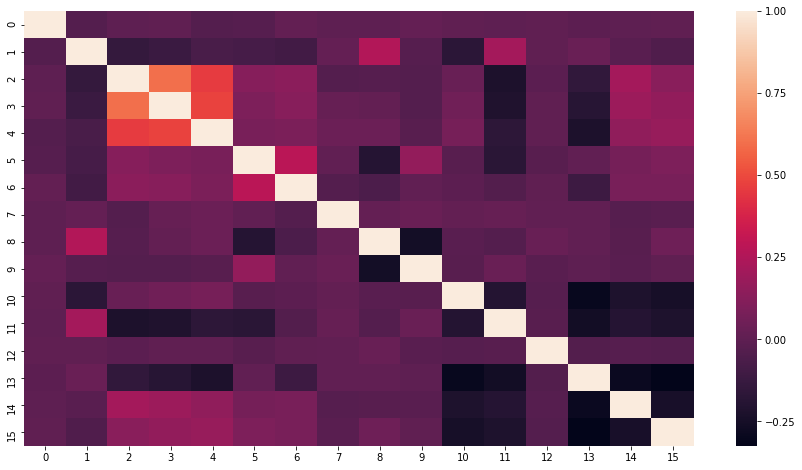

In [203]:
#let's satandardize X2 and then view it correllation matrix with heatmap
X2_stdze = sc.fit_transform(X2)

#let see how X2_stdze looks on heatmap
from matplotlib import pyplot as plt

plt.figure(figsize=(15,8))
#first we need to revert back to df as corr doesnt work with arrays
ax = sns.heatmap((pd.DataFrame(X2_stdze).corr()))

##### Seems like we have quit a lot of correllation, we will use PCA to resolve them 

In [204]:
#create another PCA object
pca2 = PCA(0.95)

#appply pca to X2
X2_comp = pca2.fit_transform(X2_stdze)
pca2.explained_variance_ratio_

array([0.15936499, 0.09705255, 0.08292578, 0.08249282, 0.0784293 ,
       0.06618222, 0.06399571, 0.06318974, 0.06140698, 0.0556144 ,
       0.05354934, 0.04174431, 0.03505653, 0.03424201])

### We are now set to run our model on these data. But we need to remember that Y2 is categorical so we can invoke the right method from sklearn

### Decision Tree Classification

In [205]:
#let's import our classifier
from sklearn.tree import DecisionTreeClassifier

#creat a classifier object
classifier = DecisionTreeClassifier(random_state=0)

#we will implement this using the cross_val_score method from sklearn.modelselection
cross_val_score(classifier, X2_comp, Y2, cv=10)

array([0.23536585, 0.18459658, 0.13096695, 0.18014706, 0.19018405,
       0.17567568, 0.17589176, 0.19211823, 0.23427867, 0.22194821])

### RF Classification

In [206]:
#We do not need to import RF classifier as it is available through ensemble

#creat a classifier object
rfc2 = ensemble.RandomForestClassifier()

cross_val_score(rfc2, X2_comp, Y2, cv=10)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

array([0.27317073, 0.20904645, 0.13341493, 0.15318627, 0.21717791,
       0.18918919, 0.20787208, 0.2044335 , 0.23797781, 0.25893958])

### Challenge: As expected, the accuracy of the RF model substantially exceeded that of the the DT for the two data used in this project. Meanwhile the overall accuracy of the models are way too low (particularly for the second data), I'm not sure if this has something to do with the sort of data I used or if I'm doing something wrong.